In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import json

In [15]:
mapper = yaml.safe_load(open('plot_mapper.yml'))
models = yaml.safe_load(open('../score.yml'))['models']
lang_fam_map = mapper['lang_family_dict']
lang_list = list(lang_fam_map.keys())

model_name_map = mapper['model_name_dict']

ACCURACY_MC_PATH = '../json/{model}_accuracy_mc.json'
ACCURACY_OE_PATH = '../json/{model}_accuracy_oe_multi.json'

In [37]:
d = []

for model in models:
    acc_mc= json.load(open(ACCURACY_MC_PATH.format(model=model)))
    acc_oe = json.load(open(ACCURACY_OE_PATH.format(model=model, oe_mode='_multi')))

    d.append({
        'model': model,
        'acc_mc': acc_mc['avg_score_all'],
        'acc_oe': acc_oe['avg_score_all']
    })

In [38]:
df = pd.DataFrame(d)
df['model'] = df['model'].map(model_name_map)
df = df[:14]
df

,model,acc_mc,acc_oe
0,Llava1.6 Vicuna 7B,36.28,4.08
1,Llava1.6 Vicuna 13B,41.30,5.34
2,Qwen2 VL Instruct 2B,42.87,9.35
3,Qwen2 VL Instruct 7B,59.69,11.07
4,Qwen2 VL Instruct 72B,69.83,17.40
5,Llama 3.2 Instruct 11B,58.79,21.67
6,Llama 3.2 Instruct 90B,73.11,20.68
7,Molmo-E 1B,20.39,0.45
8,Molmo-D 7B,44.23,5.08
9,Molmo-O 7B,38.28,6.19


In [18]:
model_params = {
    'Qwen2 VL Instruct 2B': 2208985600,
    'Qwen2 VL Instruct 7B': 8291375616,
    'Qwen2 VL Instruct 72B': 73405560320,
    'Llama 3.2 Instruct 11B': 10670220835,
    'Llama 3.2 Instruct 90B': 88593355323,
    'Llava1.6 Vicuna 7B': 7063431168,
    'Llava1.6 Vicuna 13B': 13351499776,
    'Molmo-D 7B': 8021025280,
    'Molmo-O 7B': 7665032192,
    'Molmo-E 1B': 7221875712,
    'Aria 25B': 25307308912,
    'Phi-3.5 Vision 4B': 4146621440,
    'Pixtral 12B': 12682739712,
    'NVLM-D 72B': 73405560320
}

In [48]:
model_shorten = {
    'Qwen2 VL Instruct 2B': 'Qwen2 2B',
    'Qwen2 VL Instruct 7B': 'Qwen2 7B',
    'Qwen2 VL Instruct 72B': 'Qwen2 72B',
    'Llama 3.2 Instruct 11B': 'Llama3.2 11B',
    'Llama 3.2 Instruct 90B': 'Llama3.2 90B',
    'Llava1.6 Vicuna 7B': 'Llava1.6 7B',
    'Llava1.6 Vicuna 13B': 'Llava1.6 13B',
    'Molmo-D 7B': 'Molmo-D 7B',
    'Molmo-O 7B': 'Molmo-O 7B',
    'Molmo-E 1B': 'Molmo-E 1B',
    'Aria 25B': 'Aria 25B',
    'Phi-3.5 Vision 4B': 'Phi3.5 4B',
    'Pixtral 12B': 'Pixtral 12B',
    'NVLM-D 72B': 'NVLM-D 72B'
}

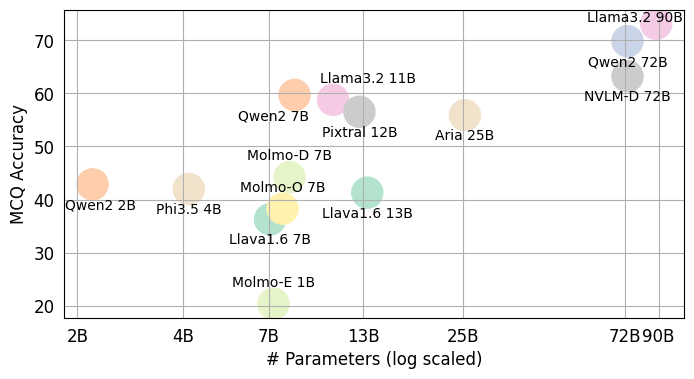

In [110]:
# Sample data: models with their Avg Score, # of Parameters, and Category for colors
data = {
    'Model': df['model'].to_list(),
    'Avg_Score': df['acc_mc'].to_list(),
    'Parameters': [model_params.get(item, item) for item in df['model'].to_list()],
}

mc_df = pd.DataFrame(data)
mc_df['Category'] = pd.factorize(mc_df['Model'])[0]  # Automatically assign a category number

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(8,4))
scatter = ax.scatter(mc_df['Parameters'], mc_df['Avg_Score'], c=mc_df['Category'], cmap='Pastel2', s=500)

# Labeling points with dynamic positioning (above or below)
for i, txt in enumerate(mc_df['Model']):
    x = mc_df['Parameters'][i]
    y = mc_df['Avg_Score'][i]

    if 'Molmo' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')
        continue
    if 'Pixtral' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(0, -15), textcoords='offset points')
        continue
    if 'Qwen2 7B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(-15, -15), textcoords='offset points')
        continue
    if 'Qwen2 2B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(6, -15), textcoords='offset points')
        continue
    if 'Llama3.2 90B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(-15, 4), textcoords='offset points')
        continue
    if 'Llama3.2 11B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(25, 15), textcoords='offset points')
        continue

    ax.annotate(model_shorten[txt], (x, y), ha='center', va='top', xytext=(0, -10), textcoords='offset points')  # Place text below the circle

ax.set_xlabel('# Parameters (log scaled)', fontsize=12)
ax.set_ylabel('MCQ Accuracy', fontsize=12)
ax.set_xscale('log')
ax.set_xticks([2000000000, 4000000000, 7000000000, 13000000000, 25000000000, 72000000000, 90000000000])
ax.set_xticklabels(['2B', '4B', '7B', '13B', '25B', '72B', '90B'])
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=12)
ax.tick_params(axis='y', which='both', left=False, right=False, labelsize=12)
ax.grid(True)

plt.show()

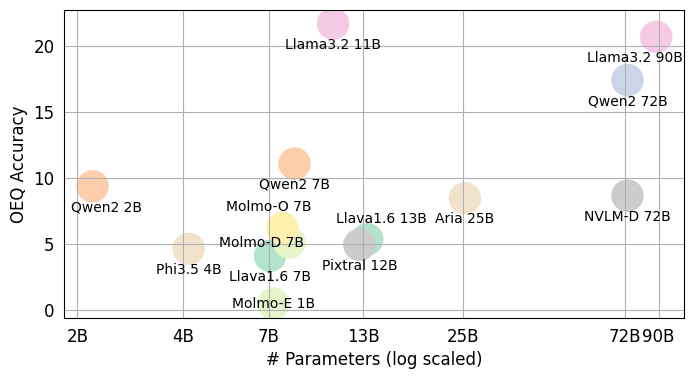

In [111]:
# Sample data: models with their Avg Score, # of Parameters, and Category for colors
data = {
    'Model': df['model'].to_list(),
    'Avg_Score': df['acc_oe'].to_list(),
    'Parameters': [model_params.get(item, item) for item in df['model'].to_list()],
}

oe_df = pd.DataFrame(data)
oe_df['Category'] = pd.factorize(oe_df['Model'])[0]  # Automatically assign a category number

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(8,4))
scatter = ax.scatter(oe_df['Parameters'], oe_df['Avg_Score'], c=oe_df['Category'], cmap='Pastel2', s=500)

# Labeling points with dynamic positioning (above or below)
for i, txt in enumerate(oe_df['Model']):
    x = oe_df['Parameters'][i]
    y = oe_df['Avg_Score'][i]

    if 'Llama3.2 90B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(-15, -15), textcoords='offset points')
        continue
    if 'Qwen2 2B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(10, -15), textcoords='offset points')
        continue
    if 'Llava1.6 13B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(10, 15), textcoords='offset points')
        continue
    if 'Molmo-O 7B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(-10, 15), textcoords='offset points')
        continue
    if 'Molmo-D 7B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(-20, 0), textcoords='offset points')
        continue
    if 'Molmo-E 1B' in model_shorten[txt]:
        ax.annotate(model_shorten[txt], (x, y), ha='center', va='center', xytext=(0, 0), textcoords='offset points')
        continue
    
    ax.annotate(model_shorten[txt], (x, y), ha='center', va='top', xytext=(0, -10), textcoords='offset points')  # Place text below the circle

ax.set_xlabel('# Parameters (log scaled)', fontsize=12)
ax.set_ylabel('OEQ Accuracy', fontsize=12)
ax.set_xscale('log')
ax.set_xticks([2000000000, 4000000000, 7000000000, 13000000000, 25000000000, 72000000000, 90000000000])
ax.set_xticklabels(['2B', '4B', '7B', '13B', '25B', '72B', '90B'])
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=12)
ax.tick_params(axis='y', which='both', left=False, right=False, labelsize=12)
ax.grid(True)

plt.show()